In [639]:
# pip install tensorflow_decision_forests 

In [640]:
import tensorflow as tf
# import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [641]:
# print("TensorFlow v" + tf.__version__)
# print("TensorFlow Decision Forests v" + tfdf.__version__)

In [642]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [643]:
dataset_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [644]:
dataset_df = dataset_df.drop('Id', axis=1)

In [645]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [646]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_22100/1574274173.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);
/tmp/ipykernel_22100/1574274173.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100,

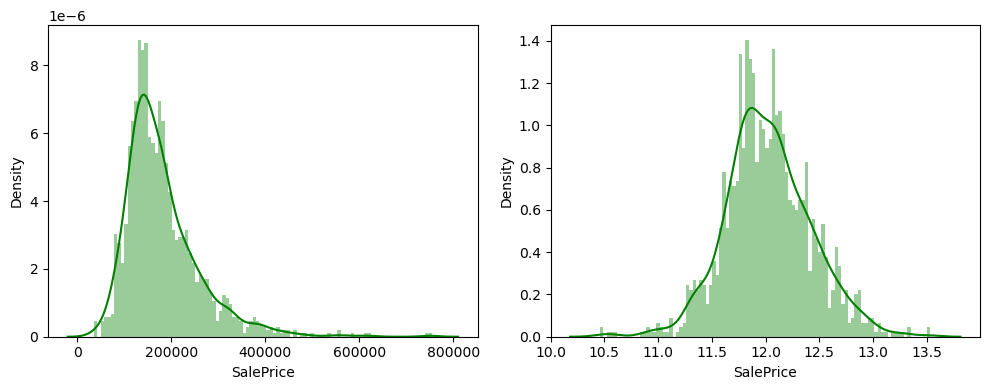

In [647]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);

dataset_df['SalePrice']= dataset_df['SalePrice'].apply(lambda x: np.log(x))

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[1])

plt.tight_layout()
plt.show()



### Change the type of the variable to the right one:

In [648]:
dataset_df['MSSubClass'] = dataset_df['MSSubClass'].astype(str)
dataset_df['OverallQual'] = dataset_df['OverallQual'].astype(int)
dataset_df['OverallCond'] = dataset_df['OverallCond'].astype(int)
# dataset_df['YearBuilt'] = dataset_df['YearBuilt'].astype(str)
# dataset_df['YearRemodAdd'] = dataset_df['YearRemodAdd'].astype(str)
# dataset_df['BsmtFullBath'] = dataset_df['BsmtFullBath'].astype(str)
# dataset_df['BsmtHalfBath'] = dataset_df['BsmtHalfBath'].astype(str)
# dataset_df['FullBath'] = dataset_df['FullBath'].astype(str)
# dataset_df['HalfBath'] = dataset_df['HalfBath'].astype(str)
dataset_df['BedroomAbvGr'] = dataset_df['BedroomAbvGr'].astype(int)
dataset_df['KitchenAbvGr'] = dataset_df['KitchenAbvGr'].astype(int)
dataset_df['TotRmsAbvGrd'] = dataset_df['TotRmsAbvGrd'].astype(int)
dataset_df['Fireplaces'] = dataset_df['Fireplaces'].astype(int)
# dataset_df['GarageYrBlt'] = dataset_df['GarageYrBlt'].astype(str)
dataset_df['GarageCars'] = dataset_df['GarageCars'].astype(str)
# dataset_df['MoSold'] = dataset_df['MoSold'].astype(str)
# dataset_df['YrSold'] = dataset_df['YrSold'].astype(str)

In [649]:
list(set(dataset_df.dtypes.tolist()))


[dtype('int64'), dtype('float64'), dtype('O')]

### Create the data set of only numerical columns:

In [650]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,12.247694
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,12.109011
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,12.317167
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,11.849398
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,12.429216


### Check how many NaN in the numerical columns:

In [651]:
df_num.isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Check the correlation between each variable VS SalePrice:

<Axes: >

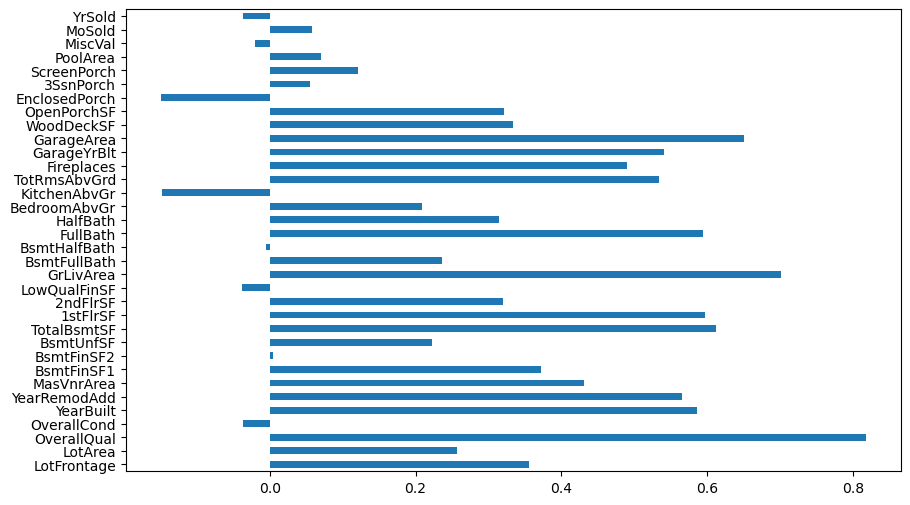

In [652]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

### View the distribution of each numerical variable:

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'Kitc

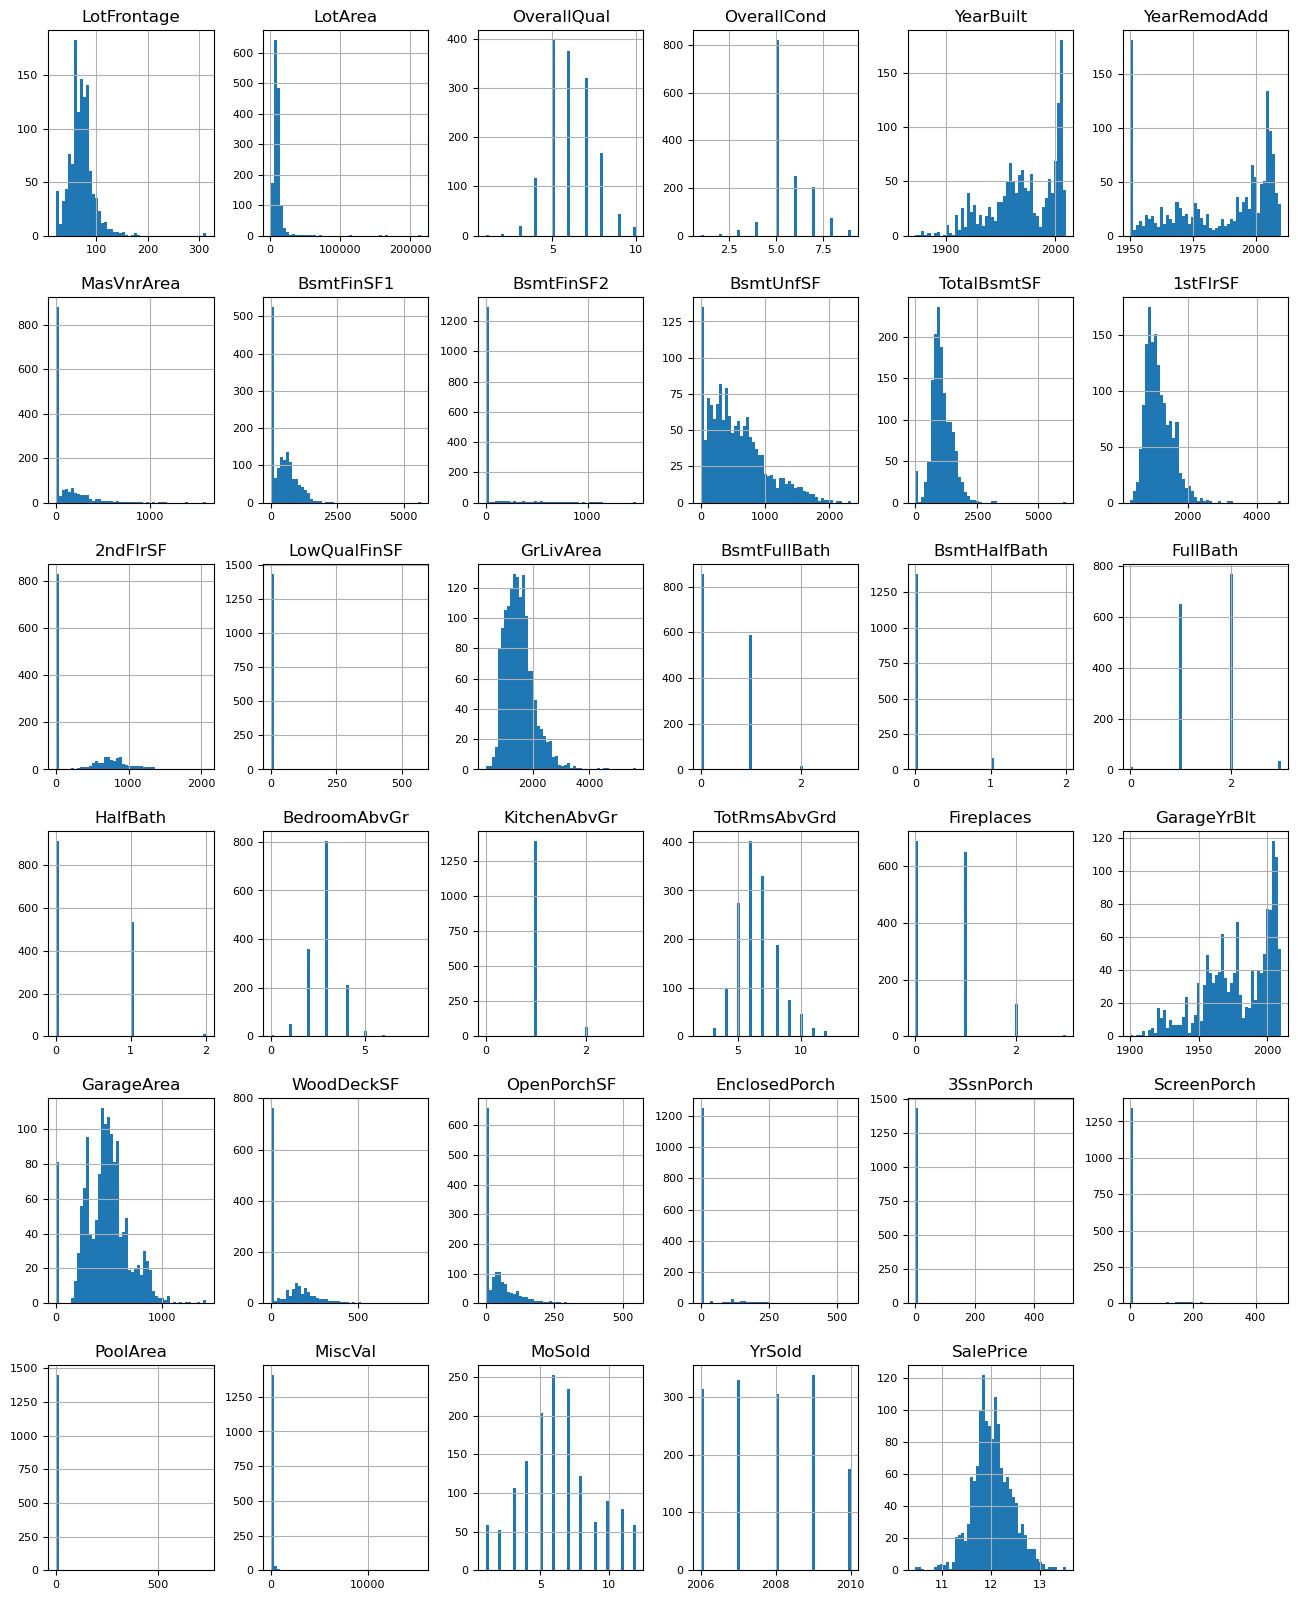

In [653]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


### Check how many NaN values in the complete dataset:

In [654]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())
print(dataset_df.isnull().sum()[dataset_df.isnull().sum() > 0])

NaN values remaining: 7829
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [655]:
dataset_df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
616,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,12.118334
259,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,11.482466
96,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,12.273731
559,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,12.363076
565,70,RL,66.0,6858,Pave,NaN,Reg,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,11.759786
580,20,RL,NaN,14585,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,12.111212
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2008,COD,Normal,11.728037
59,20,RL,60.0,7200,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,11.735269
184,50,RL,92.0,7438,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,11.751942
17,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,11.407565


### Create new better columns GarageAgeAtSale and HouseAgeAtSale and remove old one:

In [656]:
dataset_df["HouseAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["YearBuilt"].astype(float)
dataset_df["GarageAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["GarageYrBlt"].astype(float)
dataset_df = dataset_df.drop(columns=["YrSold"], errors="ignore")

### Create new better columns BsmtBath and Bath and remove old ones:

In [657]:
dataset_df["BsmtBath"] = dataset_df["BsmtFullBath"].astype(float) + 0.5 * dataset_df["BsmtHalfBath"].astype(float)
dataset_df["Bath"] = dataset_df["FullBath"].astype(float) + 0.5 * dataset_df["HalfBath"].astype(float)
dataset_df = dataset_df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

### Change columns categorical into ordinal:

In [658]:
quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_22100/1291931383.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)


In [659]:
finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}


# Remplacer les valeurs
dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
dataset_df["GarageCond"] = dataset_df["GarageCond"].replace(quality_mapping)

# dataset_df = dataset_df.drop(columns=["GarageQual"], errors="ignore")

/tmp/ipykernel_22100/3448772247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_22100/3448772247.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
/tmp/ipykernel_22100/3448772247.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [660]:
exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
dataset_df["BsmtExposure"] = dataset_df["BsmtExposure"].replace(exposure_mapping)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_22100/3286904787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
/tmp/ipykernel_22100/3286904787.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
/tmp/ipykernel_22100/3286904787.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

### Remove not important columns (related to inspector.variable_importances):

In [661]:
# dataset_df = dataset_df.drop(
#     columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
#     errors="ignore")

In [662]:
# dataset_df = dataset_df.drop(
#     columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
#              'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
#     errors="ignore")

In [663]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1201 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   Alley            91 non-null     object 
 6   LotShape         1460 non-null   object 
 7   LandContour      1460 non-null   object 
 8   Utilities        1460 non-null   object 
 9   LotConfig        1460 non-null   object 
 10  LandSlope        1460 non-null   object 
 11  Neighborhood     1460 non-null   object 
 12  Condition1       1460 non-null   object 
 13  Condition2       1460 non-null   object 
 14  BldgType         1460 non-null   object 
 15  HouseStyle       1460 non-null   object 
 16  OverallQual      1460 non-null   int64  
 17  OverallCond   

In [664]:
dataset_df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAgeAtSale,GarageAgeAtSale,BsmtBath,Bath
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,7,WD,Abnorml,13.521139,11.0,11.0,1.0,3.5
964,60,RL,80.0,11316,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,0,2,WD,Normal,12.277928,8.0,8.0,1.0,2.5
732,60,RL,75.0,11404,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,7,WD,Normal,12.312682,10.0,10.0,0.0,2.5
73,20,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,5,WD,Normal,11.883799,56.0,21.0,1.0,1.0
437,45,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,1,WD,Normal,11.686879,83.0,83.0,0.0,1.0
369,20,RL,NaN,9830,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,3,WD,Normal,11.995352,51.0,13.0,1.0,1.0
1074,20,RL,74.0,8556,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,5,WD,Normal,12.175613,1.0,1.0,0.0,2.0
931,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,7,WD,Normal,11.674194,44.0,44.0,0.5,1.0
1193,120,RM,NaN,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,6,WD,Normal,12.013701,10.0,10.0,1.0,2.0
717,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,11,WD,Normal,11.964001,35.0,35.0,0.5,1.5


In [665]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 7910


### In categorical columns, put all rare categories into one unique category "Other":

In [666]:
threshold = dataset_df.shape[0] * 0.02  # nombre minimum d'occurrences pour ne pas être rare

# Boucle sur toutes les colonnes de type object (catégorielles)
for col in dataset_df.select_dtypes(include=['object']).columns:
    counts = dataset_df[col].value_counts()
    rare_cats = counts[counts < threshold].index
    dataset_df[col] = dataset_df[col].replace(rare_cats, "Other")


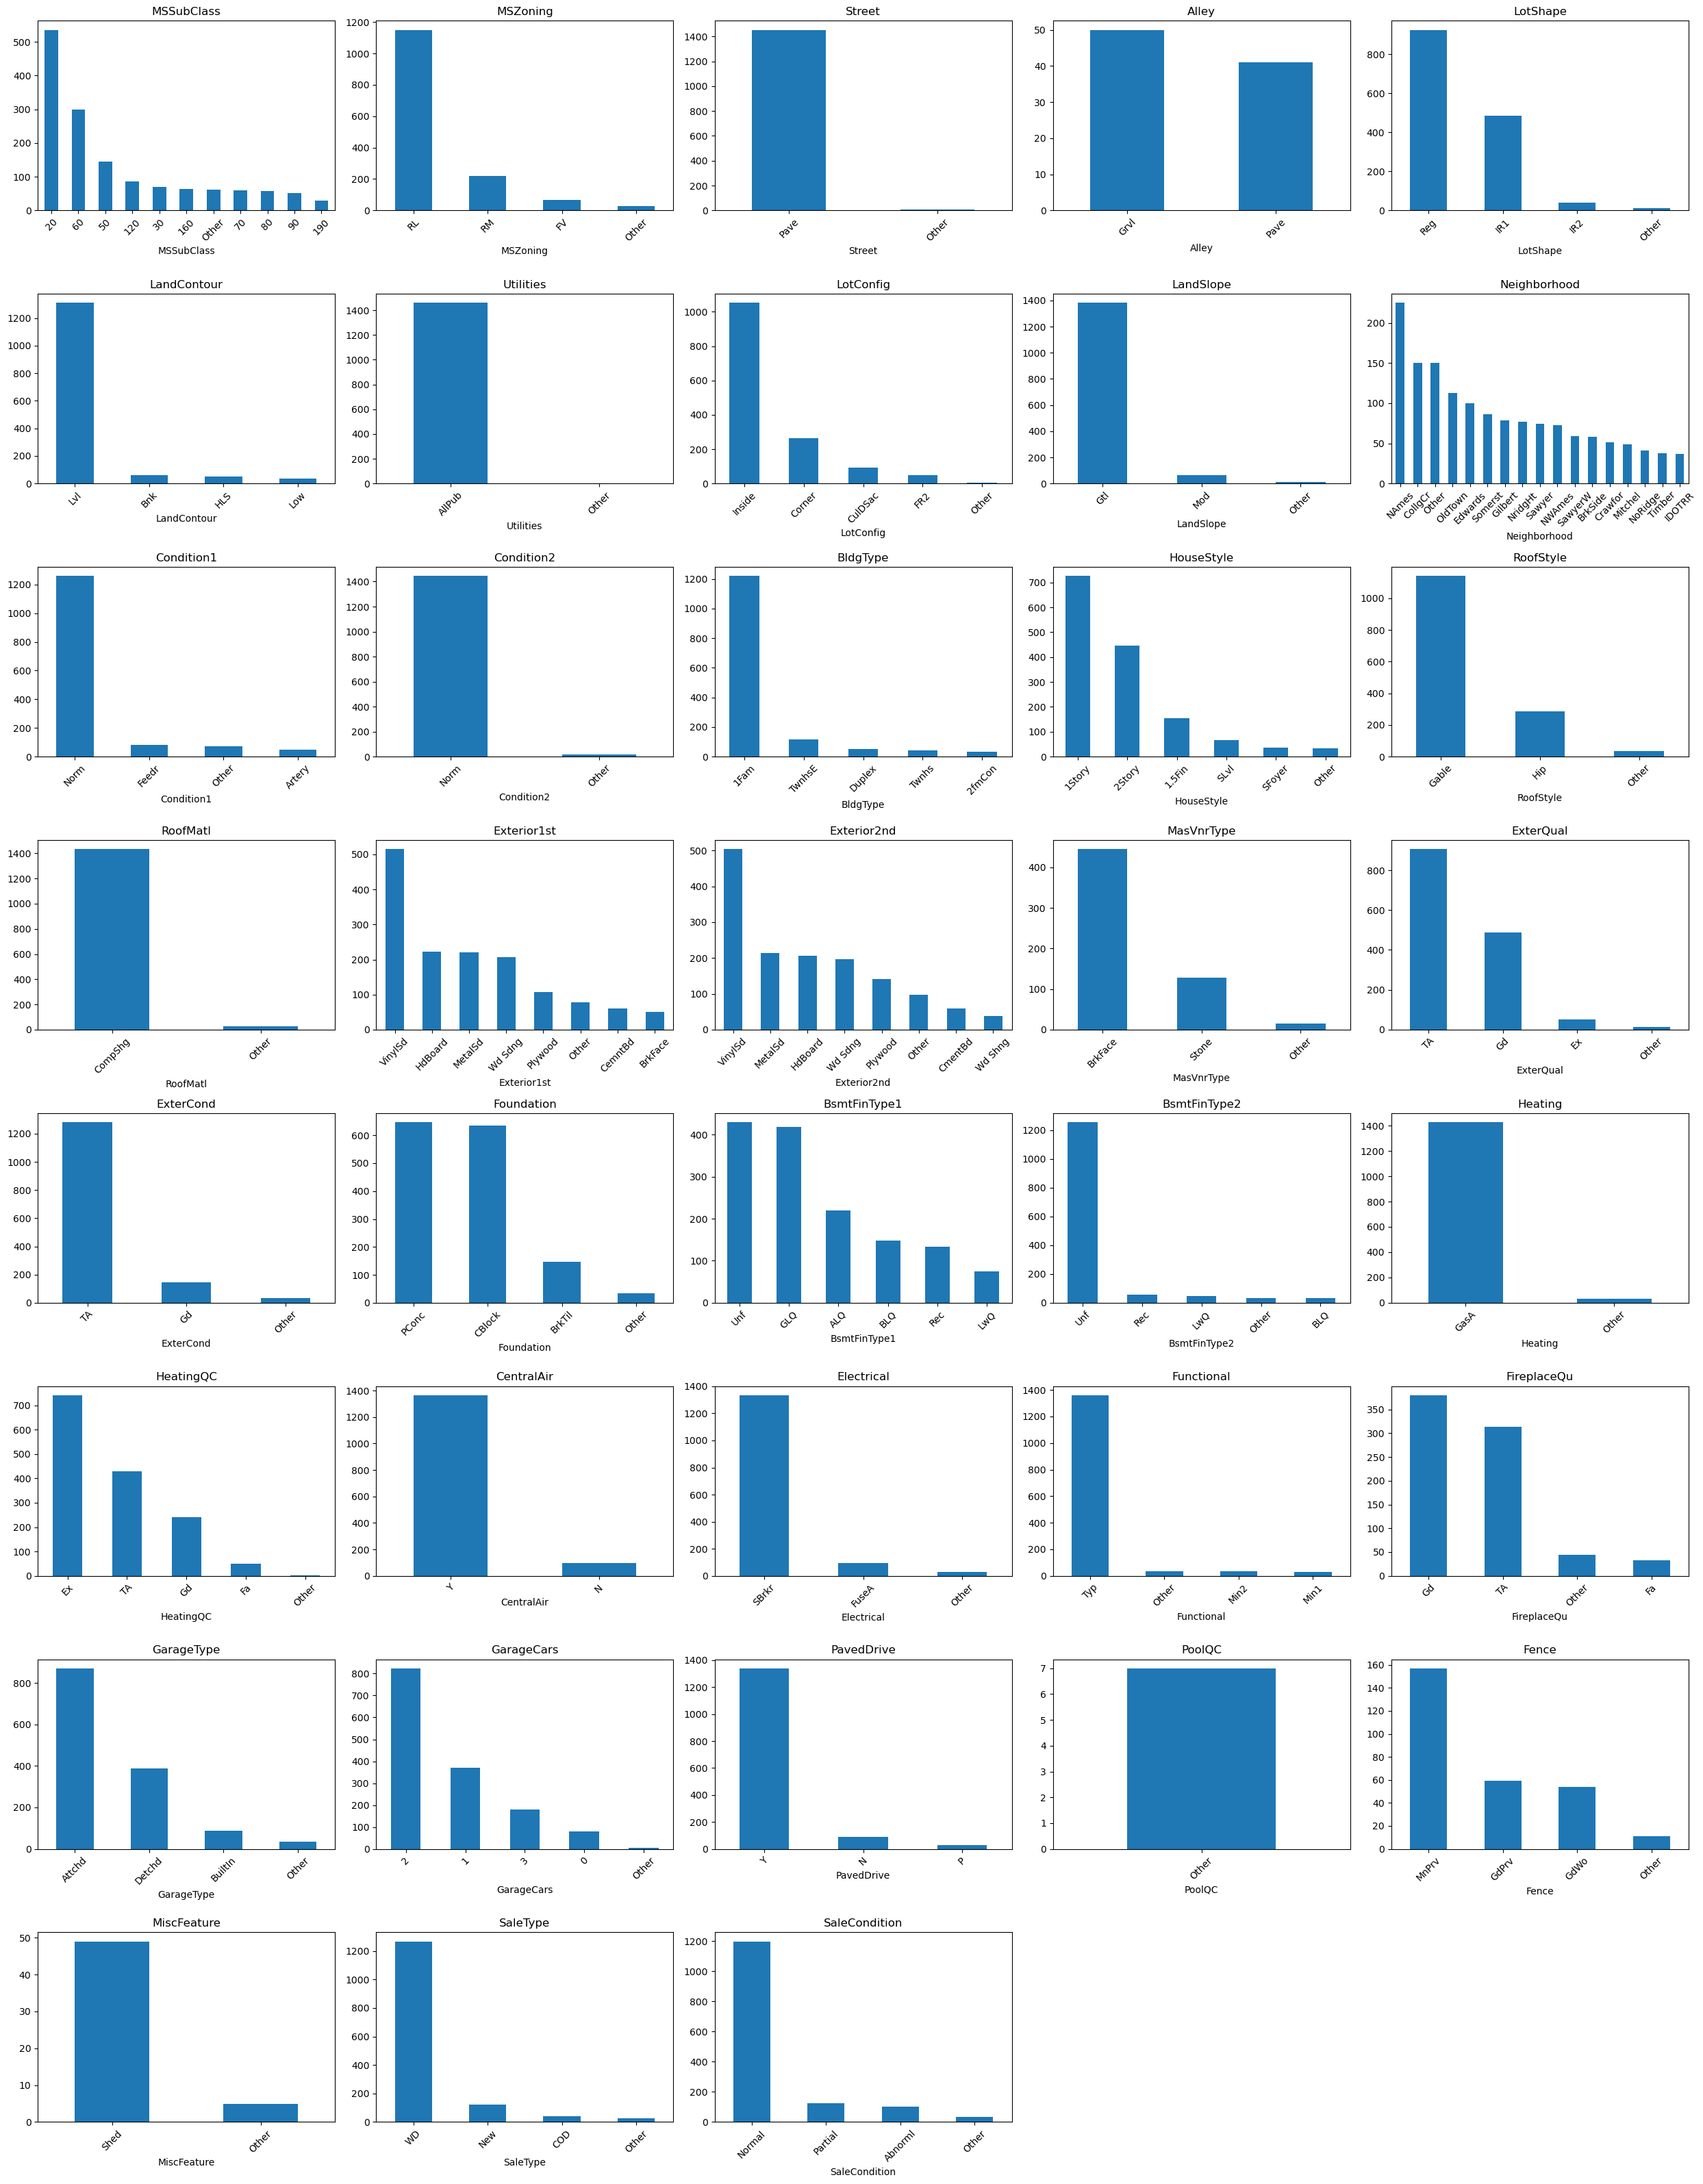

In [667]:
# dataset_df.select_dtypes(include = ['O']).plot.box(figsize=(16, 20));
cat_cols = dataset_df.select_dtypes(include=['object']).columns

# Déterminer la taille de la figure
n_cols = 5  # nombre de colonnes de subplots
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

for i, col in enumerate(cat_cols):
    dataset_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si cat_cols n'est pas multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [668]:
from sklearn.model_selection import train_test_split

# Sélection des colonnes numériques et catégorielles
numeric_cols = dataset_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = dataset_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Séparer la target
y = dataset_df['SalePrice']
X = dataset_df.drop(columns=['SalePrice'])

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [669]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Encoder les colonnes catégorielles
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_train_xgb[col] = le.fit_transform(X_train_xgb[col].astype(str))
    X_test_xgb[col] = le.transform(X_test_xgb[col].astype(str))

# Créer le modèle XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50
)

# Entraîner
xgb_model.fit(
    X_train_xgb, y_train,
    eval_set=[(X_test_xgb, y_test)],
    verbose=50
)
# Prédictions et RMSE

train_preds_xgb = xgb_model.predict(X_train_xgb)
rmse_train_xgb = mean_squared_error(np.exp(y_train), np.exp(train_preds_xgb), squared=False)
print(f"XGBoost TRAIN RMSE: {rmse_train_xgb:.2f}")

test_preds_xgb = xgb_model.predict(X_test_xgb)
rmse_test_xgb = mean_squared_error(np.exp(y_test), np.exp(test_preds_xgb), squared=False)
print(f"XGBoost TEST RMSE: {rmse_test_xgb:.2f}")


[0]	validation_0-rmse:0.39704
[50]	validation_0-rmse:0.14356
[100]	validation_0-rmse:0.13017
[150]	validation_0-rmse:0.12758
[200]	validation_0-rmse:0.12726
[250]	validation_0-rmse:0.12699
[300]	validation_0-rmse:0.12687
[350]	validation_0-rmse:0.12678
[400]	validation_0-rmse:0.12673
[450]	validation_0-rmse:0.12683
[452]	validation_0-rmse:0.12683
XGBoost TRAIN RMSE: 1358.02
XGBoost TEST RMSE: 22907.70
nb of samples in total = 1460


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [670]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error

# # Paramètres
# n_splits = 5
# label = "SalePrice"

# # Préparer les subplots (1 ligne, n_splits colonnes)
# fig, axes = plt.subplots(1, n_splits, figsize=(5 * n_splits, 4))

# # Initialiser KFold
# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# rmse_scores = []

# for i, (train_idx, test_idx) in enumerate(kf.split(dataset_df)):
    
#     # Séparer la target
#     df_train = dataset_df.iloc[train_idx]
#     X_train = df_train.drop(columns=label)
#     y_train = df_train[label]
    
#     df_test = dataset_df.iloc[test_idx]
#     X_test = df_test.drop(columns=label)
#     y_test = df_test[label]
    

#     # Créer et entraîner le modèle
#     model = tfdf.keras.RandomForestModel(
#         hyperparameter_template="benchmark_rank1",
#         task=tfdf.keras.Task.REGRESSION,
#         random_seed=42
#     )
#     model.fit(train_ds, verbose=0)

#     # Prédictions et RMSE réel (après exp)
#     test_pred_log = model.predict(test_ds)
#     test_pred_real = np.exp(test_pred_log.squeeze())
#     test_val_real = np.exp(df_test[label])
#     rmse_real = np.sqrt(mean_squared_error(test_val_real, test_pred_real))
#     rmse_scores.append(rmse_real)
#     print(f"Fold {i+1} RMSE: {rmse_real:.2f}")

#     # Logs d’entraînement
#     logs = model.make_inspector().training_logs()
#     axes[i].plot(
#         [log.num_trees for log in logs],
#         [log.evaluation.rmse for log in logs]
#     )
#     axes[i].set_title(f"Fold {i+1}")
#     axes[i].set_xlabel("Number of trees")
#     axes[i].set_ylabel("RMSE (out-of-bag)")

# plt.tight_layout()
# plt.show()

# print(f"RMSE moyen sur {n_splits} folds: {np.mean(rmse_scores):.2f}")



In [671]:
# label = 'SalePrice'
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
# valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [672]:
# tfdf.keras.get_all_models()

In [673]:
# rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# rf.compile(metrics=["mse"])

In [674]:
# rf.fit(x=train_ds)

In [675]:
# from IPython.display import HTML, display
# import tensorflow_decision_forests as tfdf

# # rf is your trained model
# html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=4)
# display(HTML(html))

In [676]:
# import matplotlib.pyplot as plt
# logs = rf.make_inspector().training_logs()
# plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
# plt.xlabel("Number of trees")
# plt.ylabel("RMSE (out-of-bag)")
# plt.show()

In [677]:
# inspector = rf.make_inspector()
# inspector.evaluation()

In [678]:
# inspector.features()

In [679]:
# evaluation = rf.evaluate(x=valid_ds,return_dict=True)

# for name, value in evaluation.items():
#   print(f"{name}: {value:.4f}")

In [680]:
# print(f"Available variable importances:")
# for importance in inspector.variable_importances().keys():
#   print("\t", importance)

In [681]:
# print(inspector.variable_importances()["NUM_AS_ROOT"])


In [682]:
# plt.figure(figsize=(12, 7))

# # Mean decrease in AUC of the class 1 vs the others.
# variable_importance_metric = "NUM_AS_ROOT"
# variable_importances = inspector.variable_importances()[variable_importance_metric]

# # Extract the feature name and importance values.
# #
# # `variable_importances` is a list of <feature, importance> tuples.
# feature_names = [vi[0].name for vi in variable_importances]
# feature_importances = [vi[1] for vi in variable_importances]
# # The feature are ordered in decreasing importance value.
# feature_ranks = range(len(feature_names))

# bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
# plt.yticks(feature_ranks, feature_names)
# plt.gca().invert_yaxis()

# # TODO: Replace with "plt.bar_label()" when available.
# # Label each bar with values
# for importance, patch in zip(feature_importances, bar.patches):
#   plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

# plt.xlabel(variable_importance_metric)
# plt.title("NUM AS ROOT of the class 1 vs the others")
# plt.tight_layout()
# plt.show()

In [683]:
# # Extraire toutes les importances
# importances = inspector.variable_importances()

# # On va récupérer seulement les 3 types qui nous intéressent
# keys = ["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]

# # Construire un DataFrame
# dfs = []
# for key in keys:
#     data = []
#     # importances[key] est une liste de tuples (feature, importance)
#     for feat, imp in importances.get(key, []):
#         if isinstance(feat, str):
#             data.append((feat, imp))
#         else:
#             data.append((feat.name, imp))  # Sinon, on extrait son .name
#     df = pd.DataFrame(data, columns=["Feature", key])
#     dfs.append(df)

# # Fusionner les 3 DataFrames
# df_importances = dfs[0]
# for df in dfs[1:]:
#     df_importances = df_importances.merge(df, on="Feature", how="outer").fillna(0)

# df_importances.sort_values("NUM_AS_ROOT", ascending=False).tail(10)

In [684]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]] = scaler.fit_transform(
#     df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]]
# )

# # Moyenne des 3 scores (ou pondération si tu veux privilégier un critère)
# df_importances["Combined"] = df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]].mean(axis=1)

# # Trier par importance combinée
# df_importances = df_importances.sort_values("Combined", ascending=False)
# df_importances.tail(15)

In [685]:
# ['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
# 'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC']

In [686]:
# import matplotlib.pyplot as plt

# top_features = df_importances.head(15)

# plt.figure(figsize=(10,15))
# plt.barh(df_importances["Feature"].astype(str), df_importances["Combined"], color="skyblue")
# plt.gca().invert_yaxis()
# plt.xlabel("Importance combinée (normalisée)")
# plt.title("Top 15 features importantes (moyenne des 3 métriques)")
# plt.show()


### Train model on full dataset:

In [687]:
# Créer le modèle XGBoost
# xgb_final_model = xgb.XGBRegressor(
#     n_estimators=500,
#     max_depth=6,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,       # nombre d'arbres
    max_depth=6,             # profondeur max de chaque arbre
    learning_rate=0.05,      # taux d'apprentissage
    subsample=0.8,           # échantillonage aléatoire des lignes
    colsample_bytree=0.8,    # échantillonage aléatoire des colonnes
    gamma=1,                 # régularisation minimum de perte
    reg_alpha=0.1,           # régularisation L1
    reg_lambda=1,            # régularisation L2
    random_state=42,
    tree_method='hist',      # rapide pour gros dataset
    eval_metric='rmse',       # métrique pour regression
)
# Séparer la target
y = dataset_df['SalePrice']
X = dataset_df.drop(columns=['SalePrice'])

# Sélection des colonnes catégorielles
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    
#Fit le modèle
xgb_model.fit(
    X, y,
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

### Prepare the test dataset for prediction:

In [688]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)

ids = test_data.pop('Id')

test_data["HouseAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["YearBuilt"].astype(float)
test_data["GarageAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["GarageYrBlt"].astype(float)
test_data = test_data.drop(columns=["YrSold"], errors="ignore")

test_data["BsmtBath"] = test_data["BsmtFullBath"].astype(float) + 0.5 * test_data["BsmtHalfBath"].astype(float)
test_data["Bath"] = test_data["FullBath"].astype(float) + 0.5 * test_data["HalfBath"].astype(float)
test_data = test_data.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
# test_data = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}
# Remplacer les valeurs
test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
test_data["GarageQual"] = test_data["GarageQual"].replace(quality_mapping)
test_data["GarageCond"] = test_data["GarageCond"].replace(quality_mapping)
# test_data = test_data.drop(columns=["GarageQual"], errors="ignore")

exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
test_data["BsmtQual"] = test_data["BsmtQual"].replace(quality_mapping)
test_data["BsmtCond"] = test_data["BsmtCond"].replace(quality_mapping)
test_data["BsmtExposure"] = test_data["BsmtExposure"].replace(exposure_mapping)

# test_data = test_data.drop(
#     columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
#     errors="ignore")

# test_data = test_data.drop(
#     columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
#              'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
#     errors="ignore")


categorical_cols = test_data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col].astype(str))



/tmp/ipykernel_22100/974443836.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
/tmp/ipykernel_22100/974443836.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_22100/974443836.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=

### Write submission.csv:

In [689]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = xgb_final_model.predict(test_data)
sample_submission_df['SalePrice']= sample_submission_df['SalePrice'].apply(lambda x: np.exp(x))
sample_submission_df.to_csv('../submissions/submission15_putback_deleted_columns.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,120804.418250
1,1462,151345.629010
2,1463,177300.587676
3,1464,180687.901310
4,1465,181142.528672


In [690]:
# kaggle competitions submit -c house-prices-advanced-regression-techniques -f work/submissions/submission11_retrain_model_on_full_DS.csv -m "11th try: retrain model on full DS "